In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# k = number of clusters


UNCLASSIFIED = False
NOISE        = None

class DBscan:
    

    def __init__(self , data , epsilon , min_points):
        self.data       = data
        self.epsilon    = epsilon
        self.min_points = min_points
        
        self.number_of_data_points = data.shape[0]
        
        self.classifications = [UNCLASSIFIED] * self.number_of_data_points
        self.NOC = 0
        
        
        
    def __str__(self):
        return f'''
     epsilon            : {self.epsilon}                           
     min_points         : {self.min_points}                        
     num data points    : {self.number_of_data_points}             
     number of clusters : {self.NOC}                                       
        '''
    def distance(self , p , q):
        return np.sqrt(np.sum((p-q)**2))
    
    def is_neighbor(self , p , q):
        return self.distance(p,q) < self.epsilon
    
    def get_neighbors(self , point_id):
        neighbors_index = []
        p = self.data[point_id,:]
        for i in range(self.number_of_data_points):
            q = self.data[i,:]
            if (self.is_neighbor(p , q)):
                neighbors_index.append(i)
        return neighbors_index
    
    def expandCluster(self , point_id , cluster_id):
        
        neighbors_index = self.get_neighbors(point_id)
        
        if(len(neighbors_index) < self.min_points):    # this point is noise point
            self.classifications[point_id] = NOISE
            return False
        
        else:
            self.classifications[point_id] = cluster_id
        
            for neighbor in neighbors_index:    # put all neighbor in the same cluster
                self.classifications[neighbor] = cluster_id

            while len(neighbors_index) > 0:
                
                current_point = neighbors_index[0]
                result        = self.get_neighbors(current_point)
                
                if(len(result) >= self.min_points):  #this point is a core point
                    for i in range(len(result)):
                        point_index = result[i]
                        if self.classifications[point_index] == UNCLASSIFIED or \
                           self.classifications[point_index] == NOISE:   #this point was marked as noise because there wasn't core beside it
                            if self.classifications[point_index] == UNCLASSIFIED:
                                neighbors_index.append(point_index)
                            self.classifications[point_index] = cluster_id
                            
                neighbors_index = neighbors_index[1:]
            return True
    
        
    def fit(self):
        cluster_id = 1
        for i in range(self.number_of_data_points):
            p = self.data[i,:]
            if self.classifications[i] == UNCLASSIFIED:
                if self.expandCluster(i , cluster_id):
                    cluster_id += 1
        self.NOC = cluster_id - 1
        return self

    def show(self):
        print(self)
        dall = np.concatenate((self.data , np.array(self.classifications).reshape((self.number_of_data_points,1))) , axis=1)
        x = 5
        plt.figure(figsize=(x*2 , x))
        plt.scatter(dall[:,0] ,dall[:,1] , c=dall[:,2])
        plt.show()




     epsilon            : 1.2                           
     min_points         : 6                        
     num data points    : 788             
     number of clusters : 7                                       
        


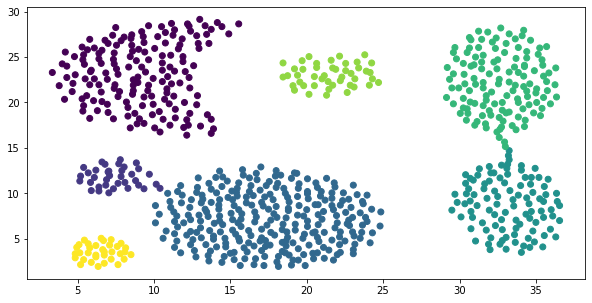

In [60]:
data = np.array(pd.read_csv("k_means_clustering_test_1.csv"))
m = DBscan(data , epsilon=1.2 , min_points=6).fit().show()


     epsilon            : 1.2                           
     min_points         : 6                        
     num data points    : 3100             
     number of clusters : 4                                       
        


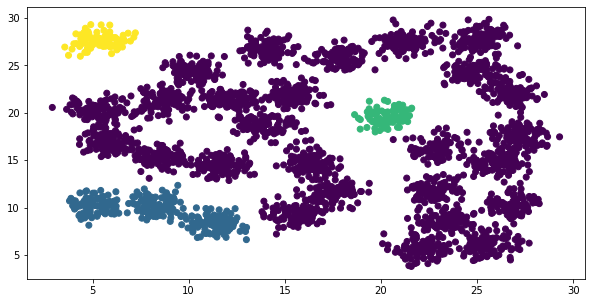

In [61]:
data = np.array(pd.read_csv("K31.csv"))
m = DBscan(data , epsilon=1.2 , min_points=6).fit().show()